In [15]:
#plots in the notebook or console, no popups 
%matplotlib inline

In [151]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
plt.style.use('ggplot')

In [152]:
#Read in 2 sets of data
df = pd.read_csv("zocdoc2.csv")
df['specialty'] = df['specialty'].str.strip()

In [153]:
#Average rating of all doctors on Zocdoc
round(df['rating'].mean(),2)

4.76

/Users/angielin/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/angielin/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0, 0.5, 'Density')

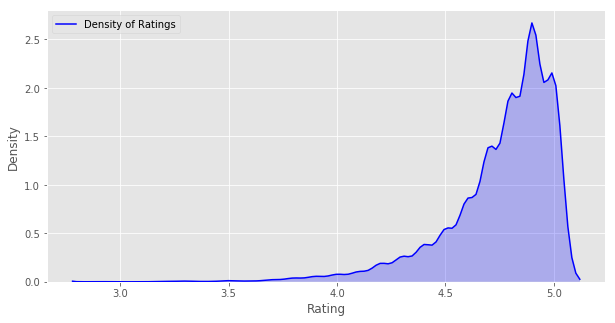

In [154]:
#Desity plot of the average ratings
plt.figure(figsize=(10,5))
sns.kdeplot(df['rating'], shade=True, label='Density of Ratings', color ='b', bw = 0.04)
plt.xlabel('Rating')
plt.ylabel('Density')
#The plot is clearly skewed towards the left. 
# Why the abnormal amount of positive reviews?
# Zocdoc is not like Yelp, where the consumer is in full control of what to review. 
# Doctors pay to use it. 
# As a business, they have an insentive to promote positive reviews. 
# Doctors will only pay to use Zocdoc should they want to , so if their reviews are no good, they wont have a Zocdoc. 

Text(0, 0.5, 'Average Rating')

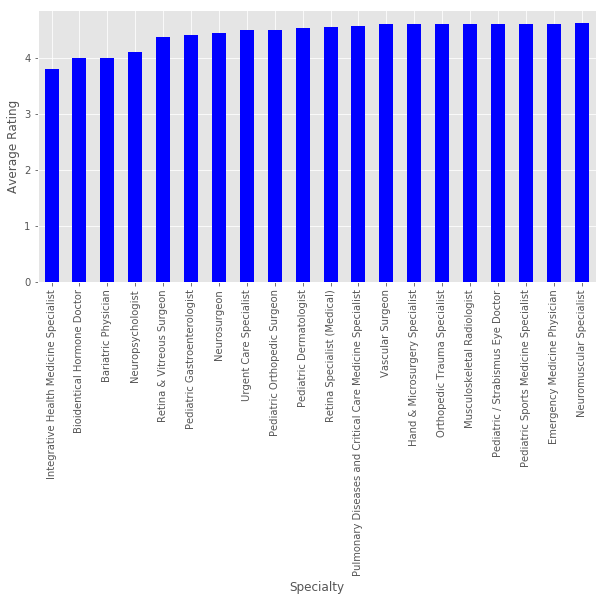

In [155]:
#Lowest Average rating specialties
plt.figure(figsize=(10,5))
df.dropna().groupby('specialty')['rating'].mean().sort_values(ascending=True).head(20).plot.bar(color='b')
plt.xlabel('Specialty')
plt.xticks(rotation = 90)
plt.ylabel('Average Rating')
# sns.set(style="whitegrid")
# temp = df.groupby('specialty')['rating'].mean().sort_values(ascending=True).head(20)
# temp = pd.DataFrame(temp)
# sns.barplot(x = 'specialty', y = "rating", data = temp)

Text(0, 0.5, 'Number of Doctors')

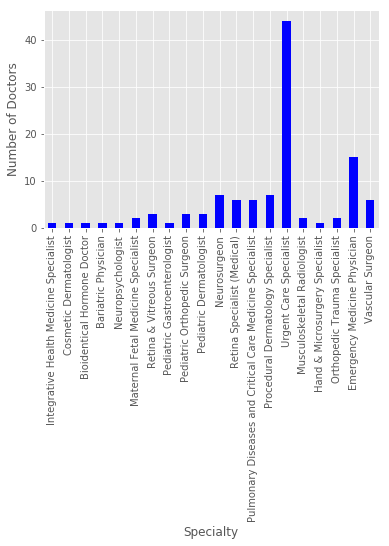

In [396]:
#Number of doctors in the lowest rating specialties
a = list((df.groupby('specialty')['rating'].mean().sort_values(ascending=True).head(20)).to_dict().keys())
final = []
a[0].strip()
[final.append(i.strip()) for i in a]
df['specialty'].value_counts()[final].plot.bar(color='b')
plt.xlabel('Specialty')
plt.ylabel('Number of Doctors')

Text(0.5, 0, 'Number of Reviews')

<Figure size 864x432 with 0 Axes>

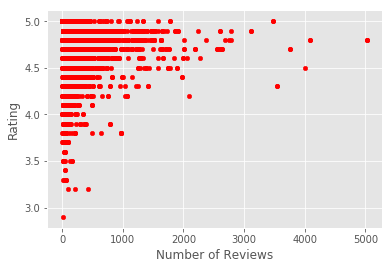

In [397]:
#Number of reviews by rating
plt.figure(figsize=(12,6))
df.plot.scatter(x='review', y='rating', color='r')
plt.ylabel('Rating')
plt.xlabel('Number of Reviews')

Text(0, 0.5, 'Number of Review')

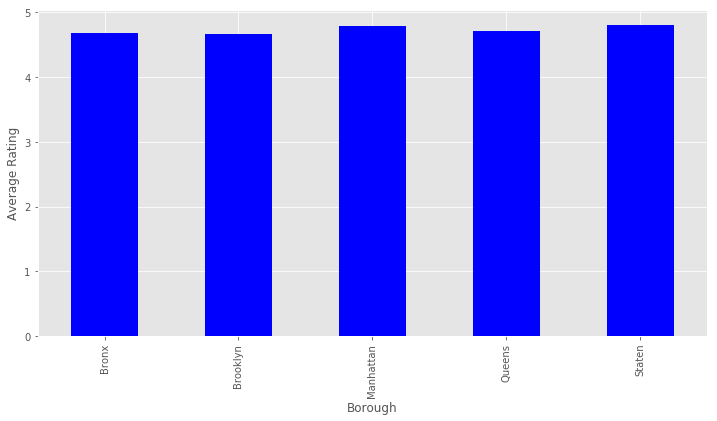

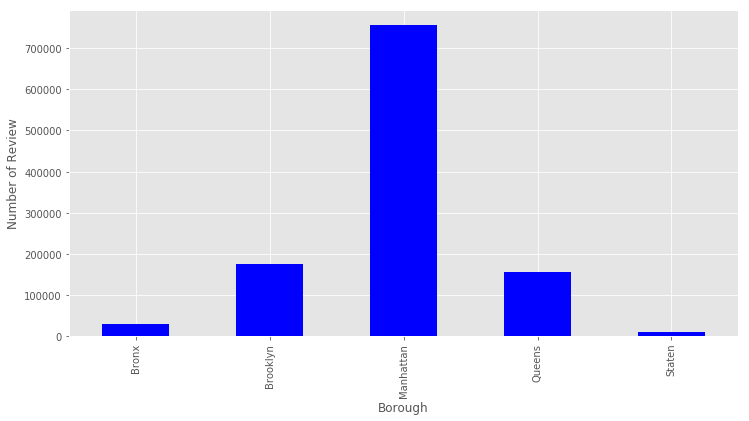

In [398]:
#average rating and number of reviews by Borough
plt.figure(figsize=(12,6))
df.groupby('area')['rating'].mean().plot.bar(color='b')
plt.xlabel('Borough')
plt.ylabel('Average Rating')
plt.figure(figsize=(12,6))
df.groupby('area')['review'].sum().plot.bar(color='b')
plt.xlabel('Borough')
plt.ylabel('Number of Review')

Text(0, 0.5, 'Specialty')

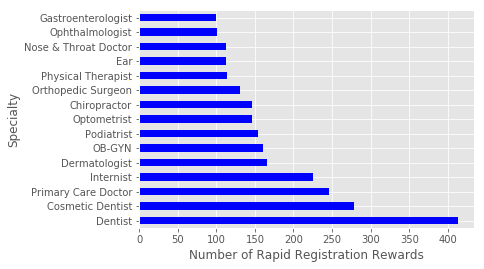

In [399]:
#Number of awards by specialty
df2 = df 
df2["rrTF"] = df2['awards'].str.count("Rapid registration")
df2["spTF"] = df2['awards'].str.count("Speedy response")
df2["syaTF"] = df2['awards'].str.count("See you again")
df2["heroTF"] = df2['awards'].str.count("Scheduling hero")

# print(df2.groupby('specialty')['rrTF'].sum().sort_values(ascending=False).head(15))
# print(df2.groupby('specialty')['spTF'].sum().sort_values(ascending=False).head(15))
# print(df2.groupby('specialty')['syaTF'].sum().sort_values(ascending=False).head(15))
# df2.groupby('specialty')['heroTF'].sum().sort_values(ascending=False).head(15)

df2.groupby('specialty')['rrTF'].sum().sort_values(ascending=False).head(15).plot.barh(color='b')
plt.xlabel('Number of Rapid Registration Rewards')
plt.ylabel('Specialty')

Text(0, 0.5, 'Specialty')

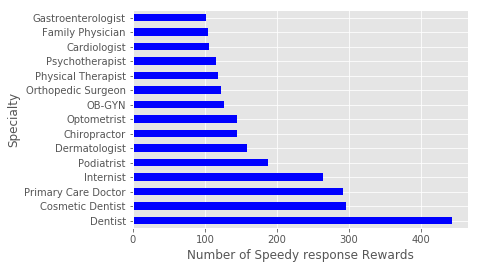

In [400]:
df2.groupby('specialty')['spTF'].sum().sort_values(ascending=False).head(15).plot.barh(color='b')
plt.xlabel('Number of Speedy response Rewards')
plt.ylabel('Specialty')

Text(0, 0.5, 'Specialty')

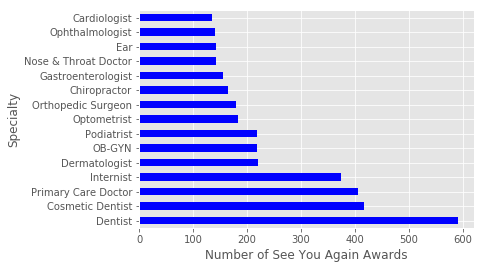

In [401]:
df2.groupby('specialty')['syaTF'].sum().sort_values(ascending=False).head(15).plot.barh(color='b')
plt.xlabel('Number of See You Again Awards')
plt.ylabel('Specialty')

Text(0, 0.5, 'Specialty')

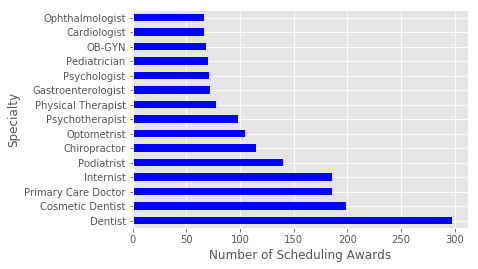

In [402]:
df2.groupby('specialty')['heroTF'].sum().sort_values(ascending=False).head(15).plot.barh(color='b')
plt.xlabel('Number of Scheduling Awards')
plt.ylabel('Specialty')

In [403]:
a = (df2.groupby('gender')['rrTF'].sum().sort_values(ascending=False)/df2['gender'].value_counts()).to_dict()
a = pd.DataFrame(list(a.items()), columns=['gender', 'sum'])
a["word"] = "Rapid Registration"
b = (df2.groupby('gender')['spTF'].sum().sort_values(ascending=False)/df2['gender'].value_counts()).to_dict()
b = pd.DataFrame(list(b.items()), columns=['gender', 'sum'])
b["word"] = "Speedy Response"
c = (df2.groupby('gender')['syaTF'].sum().sort_values(ascending=False)/df2['gender'].value_counts()).to_dict()
c = pd.DataFrame(list(c.items()), columns=['gender', 'sum'])
c["word"] = "See you again"
d = (df2.groupby('gender')['heroTF'].sum().sort_values(ascending=False)/df2['gender'].value_counts()).to_dict()
d = pd.DataFrame(list(d.items()), columns=['gender', 'sum'])
d["word"] = "Scheduling Hero"
final = pd.concat([a, b, c, d])

<Figure size 864x432 with 0 Axes>

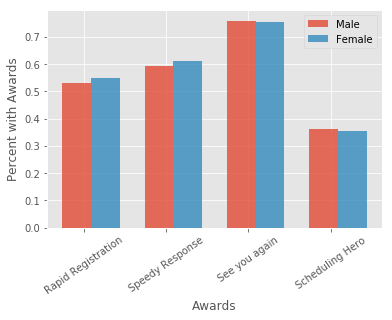

In [404]:
#Proportion of awards by gender
plt.figure(figsize=(12,6))
fig, ax = plt.subplots()
index = np.arange(4)

rects1 = plt.bar(index, final.loc[0]["sum"] , 0.35,
alpha= 0.8,
label='Male')

rects2 = plt.bar(index + 0.35, final.loc[1]["sum"], 0.35,
alpha= 0.8,
label='Female')

plt.xlabel('Awards')
plt.ylabel('Percent with Awards')
#plt.title('')
plt.xticks(index + 0.35/4, final['word'].unique(), rotation = 35)
plt.legend()